In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
pickle_in=open("cleaned_data_2021.pickle","rb")
df=pickle.load(pickle_in)
# This section creates a few new variables
# home_margin is the margin of victory or defeat for the home team
df['home_margin']=df.home_score-df.away_score
# home_hotter is a dummy where 1 means that the home team has won a 
# greater percentage of their recent games
df['home_hotter']=df.home_streak>=df.away_streak
# open_vegas_predict is a dummy where 1 means that the home team was
# favored when odds makers started the betting
df['open_vegas_predict']=df.home_prob_open>.5
# change_vegas_predict is a dummy where 1 means that the betting 
# market moved for the home team from during the time when bets were placed
df['change_vegas_predict']=df.home_prob_change>0
# vegas_predict is a dummy variable where 1 means that Vegas picks the
# home team at the start of the game
df['vegas_predict']=df.home_prob_close>=.5

In [2]:
def calc_return(X_analyse):
    total_risk=[]
    total_reward=[]
    equal_bet_return=[]
    for i in range(len(X_analyse)):
        k=pd.DataFrame(X_analyse.iloc[i]).transpose()
        k.reset_index(drop=True,inplace=True)
        if int(k.preds[0])==1:
            if int(k.real[0])==1:
                if int(k.home_money[0])<0:
                    risk=k.home_money[0]
                    reward=100
                else:
                    risk=-100
                    reward=k.home_money[0]
            else:
                if k.home_money[0]<0:
                    risk=k.home_money[0]
                    reward=k.home_money[0]
                else:
                    risk=-100
                    reward=-100
        else:
            if int(k.real[0])==0:
                if k.away_money[0]<0:
                    risk=k.away_money[0]
                    reward=100
                else:
                    risk=-100
                    reward=k.away_money[0]
            else:
                if k.away_money[0]<0:
                    risk=k.away_money[0]
                    reward=k.away_money[0]
                else:
                    risk=-100
                    reward=-100
        total_risk.append(risk)
        total_reward.append(reward)
        equal_bet_winnings=reward/-risk*100
        equal_bet_return.append(equal_bet_winnings)
    natural_ror=round(-np.mean(total_reward)/np.mean(total_risk)*100,2)
    equal_bet_ror=round(np.mean(equal_bet_return),2)
    return natural_ror,equal_bet_ror

Accuracy Score:  56.1
Natural Return on Risk:  -4.62 %
Equal Return on Risk:  -4.26 %
Implied Odds vs Percent of Games r-squared: 0.73


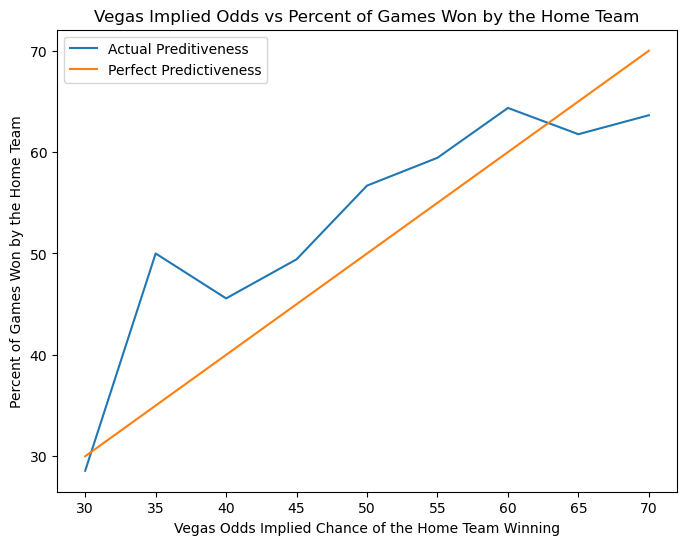

In [3]:
a=pd.DataFrame([])
x=[30,35,40,45,50,55,60,65,70]
y=[30,35,40,45,50,55,60,65,70]
for i in [.3,.35,.4,.45,.5,.55,.6,.65,.7]:
    holder=df[df.home_prob_open>i]
    holder=holder[holder.home_prob_open<i+.05]
    if len(holder>0):
        b=sum(holder.home_win)/len(holder)
    else:
        b=0
    a=a.append(pd.DataFrame({'bin_num':i*100,'pct':b*100},index=[0]),ignore_index=True)
plt.figure(figsize=(8,6))
plt.plot(x,a.pct,label="Actual Preditiveness")
plt.plot([30,70],[30,70],label='Perfect Predictiveness')
plt.xlabel('Vegas Odds Implied Chance of the Home Team Winning')
plt.ylabel('Percent of Games Won by the Home Team')
plt.legend()
plt.title('Vegas Implied Odds vs Percent of Games Won by the Home Team')
bet_w_vegas_open=df[['open_vegas_predict','home_win','home_money_close','away_money_close']].copy()
bet_w_vegas_open=bet_w_vegas_open.rename(columns={'open_vegas_predict':'preds','home_win':'real',
                                       'home_money_close':'home_money','away_money_close':'away_money'})
bet_w_vegas_open.preds=bet_w_vegas_open.preds*1
nat,eq=calc_return(bet_w_vegas_open)
print('Accuracy Score: ',round(accuracy_score(bet_w_vegas_open.real,bet_w_vegas_open.preds) * 100,2))
print('Natural Return on Risk: ',nat,'%')
print('Equal Return on Risk: ',eq,'%')
print('Implied Odds vs Percent of Games r-squared:',round(r2_score(y,a.pct),2))

Text(0.5, 1.0, 'Change in Vegas Implied Odds vs Percent of Games Won by the Home Team')

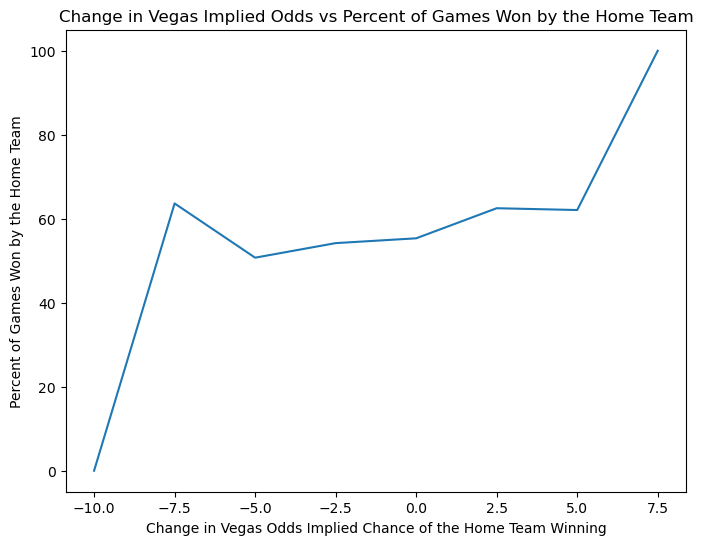

In [4]:
a=pd.DataFrame([])
for i in [-.1,-.075,-.05,-.025,0,.025,.05,.075]:
    holder=df[df.home_prob_change>i]
    holder=holder[holder.home_prob_change<i+.025]
    if len(holder>0):
        b=sum(holder.home_win)/len(holder)
    else:
        b=0
    a=a.append(pd.DataFrame({'bin_num':i*100,'pct':b*100},index=[0]),ignore_index=True)
plt.figure(figsize=(8,6))
plt.plot(a.bin_num,a.pct)
#plt.plot([30,70],[30,70],label='Perfect Predictiveness')
plt.xlabel('Change in Vegas Odds Implied Chance of the Home Team Winning')
plt.ylabel('Percent of Games Won by the Home Team')
plt.title('Change in Vegas Implied Odds vs Percent of Games Won by the Home Team')

Accuracy Score:  56.99
Natural Return on Risk:  -3.74 %
Equal Return on Risk:  -3.13 %
Implied Odds vs Percent of Games r-squared: -3.0


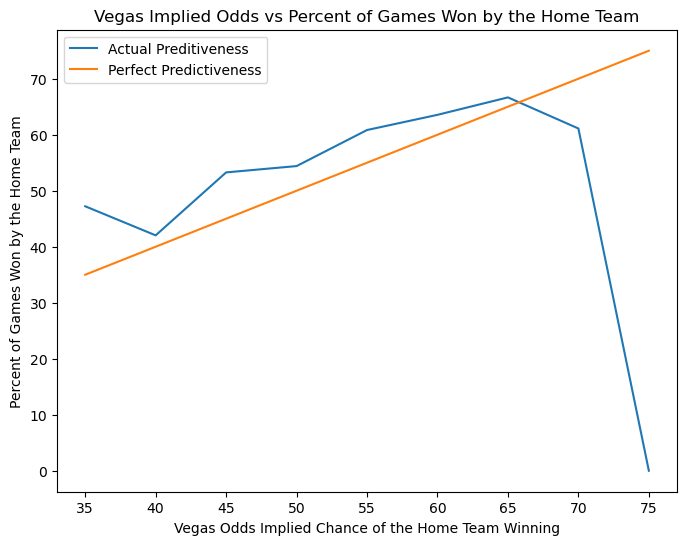

In [5]:
a=pd.DataFrame([])
x=[35,40,45,50,55,60,65,70,75]
y=[35,40,45,50,55,60,65,70,75]
for i in [.35,.4,.45,.5,.55,.6,.65,.7,.75]:
    holder=df[df.home_prob_close>i]
    holder=holder[holder.home_prob_close<i+.05]
    if len(holder>0):
        b=sum(holder.home_win)/len(holder)
    else:
        b=0
    a=a.append(pd.DataFrame({'bin_num':i*100,'pct':b*100},index=[0]),ignore_index=True)
plt.figure(figsize=(8,6))
plt.plot(x,a.pct,label="Actual Preditiveness")
plt.plot([35,75],[35,75],label='Perfect Predictiveness')
plt.xlabel('Vegas Odds Implied Chance of the Home Team Winning')
plt.ylabel('Percent of Games Won by the Home Team')
plt.legend()
plt.title('Vegas Implied Odds vs Percent of Games Won by the Home Team')
bet_w_vegas_close=df[['vegas_predict','home_win','home_money_close','away_money_close']].copy()
bet_w_vegas_close=bet_w_vegas_close.rename(columns={'vegas_predict':'preds','home_win':'real',
                                       'home_money_close':'home_money','away_money_close':'away_money'})
bet_w_vegas_close.preds=bet_w_vegas_close.preds*1
nat,eq=calc_return(bet_w_vegas_close)
print('Accuracy Score: ',round(accuracy_score(bet_w_vegas_close.real,bet_w_vegas_close.preds) * 100,2))
print('Natural Return on Risk: ',nat,'%')
print('Equal Return on Risk: ',eq,'%')
print('Implied Odds vs Percent of Games r-squared:',round(r2_score(y,a.pct),2))